### Predicción de los precios de las acciones utilizando LSTM en Keras

By Elías Jesús Ventura-Molina

### Librerias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


### Importae el conjunto de entrenamiento

In [2]:
dataset_train = pd.read_csv('NSE-TATAGLOBAL.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
# Visualizar algunos datos del conjunto de entrenamiento
dataset_train.head()


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
# Normalizacion de los datos entre 0 y 1
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

Las capas LSTM necesitan un tamaño especifico, normalmento matrices 3D.    
En esta parte se convierten los datos a un tamaño que las capas LSTM puedan entender y se crea el conjunto de entrenamiento

In [5]:
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

### Modelo

El modelo se llama regressor y contiene cuatro capas LSTM y una capa densa.

In [6]:
# Inicializar el modelo como secuencial
regressor = Sequential()

# Primera capa LSTM y regularizacion Dropout
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Segunda capa LSTM y regularizacion Dropout
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Tercera capa LSTM y regularizacion Dropout
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Cuarta capa LSTM y regularizacion Dropout
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Capa de salida
regressor.add(Dense(units = 1))

# Compilar el modelo
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')


### Entrenamiento

In [7]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1975/1975 [==============================] - 7s 4ms/step - loss: 0.0094
Epoch 2/100
1975/1975 [==============================] - 6s 3ms/step - loss: 0.0032
Epoch 3/100
1975/1975 [==============================] - 6s 3ms/step - loss: 0.0029
Epoch 4/100
1975/1975 [==============================] - 6s 3ms/step - loss: 0.0023
Epoch 5/100
1975/1975 [==============================] - 6s 3ms/step - loss: 0.0022
Epoch 6/100
1975/1975 [==============================] - 7s 4ms/step - loss: 0.0024
Epoch 7/100
1975/1975 [==============================] - 7s 3ms/step - loss: 0.0023
Epoch 8/100
1975/1975 [==============================] - 6s 3ms/step - loss: 0.0019
Epoch 9/100
1975/1975 [==============================] - 6s 3ms/step - loss: 0.0018
Epoch 10/100
1975/1975 [==============================] - 6s 3ms/step - loss: 0.0019
Epoch 11/100
1975/1975 [==============================] - 6s 3ms/step - loss: 0.0021
Epoch 12/100
1975/1975 [==============================] - 6s 3ms/step - lo

### Realizar predicciones

In [8]:
# Datos reales

# Obtencion de los verdaderos precios del 2017
dataset_test = pd.read_csv('tatatest.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [9]:
# Predicciones

# Predicciones de los precios del 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


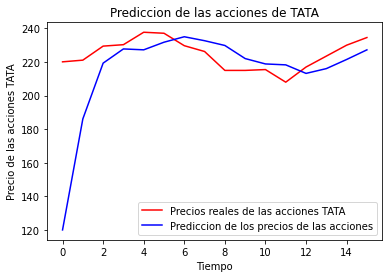

In [10]:
# Visualizacion de los resultados

plt.plot(real_stock_price, color = 'red', label = 'Precios reales de las acciones TATA')
plt.plot(predicted_stock_price, color = 'blue', label = 'Prediccion de los precios de las acciones')
plt.title('Prediccion de las acciones de TATA')
plt.xlabel('Tiempo')
plt.ylabel('Precio de las acciones TATA')
plt.legend()
plt.show()